In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#librerias para el preprocesamiento del dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')

# Leyendo los datos desde el csv

In [5]:
data = pd.read_csv("diabetes.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
print('shape of dataset is '+str(data.shape[0]))

shape of dataset is 768


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
#nos muestra los datos que son nulos y hace la suma
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#reemplazar los valores que no pueden ser nulos los reemplazamos por valores de 0 a NaN
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
#hace la suma de los datos nulos 
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [18]:
from scipy.stats import skew
for col in data.drop('Outcome', axis=1).columns:
    print("Skewness for the colum {} is {}".format(col, data[col].skew()))

Skewness for the colum Pregnancies is 0.9016739791518588
Skewness for the colum Glucose is 0.5309885349396285
Skewness for the colum BloodPressure is 0.13415273171959252
Skewness for the colum SkinThickness is 0.690619013984192
Skewness for the colum Insulin is 2.166463843812443
Skewness for the colum BMI is 0.5939697505712673
Skewness for the colum DiabetesPedigreeFunction is 1.919911066307204
Skewness for the colum Age is 1.1295967011444805


#### Las columnas como Pregnancies, Glucose, BloodPressure, SkinThinckness y BMI no tienen mucha oblicuidad. Nosotros podemos rellenar los datos con la media de aquellas columnas pero las columnas como insulin y DiabetesPedigreeFunction no podemos reemplazarlos con el efecto de la media por la oblicuidad.

In [21]:
data['Insulin']= data['Insulin'].fillna(data['Insulin'].median()) 

for col in ['Glucose', 'BloodPressure','SkinThickness','BMI']:
    data[col] = data[col].fillna(data[col].mean())

In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Analisis Exploratorio

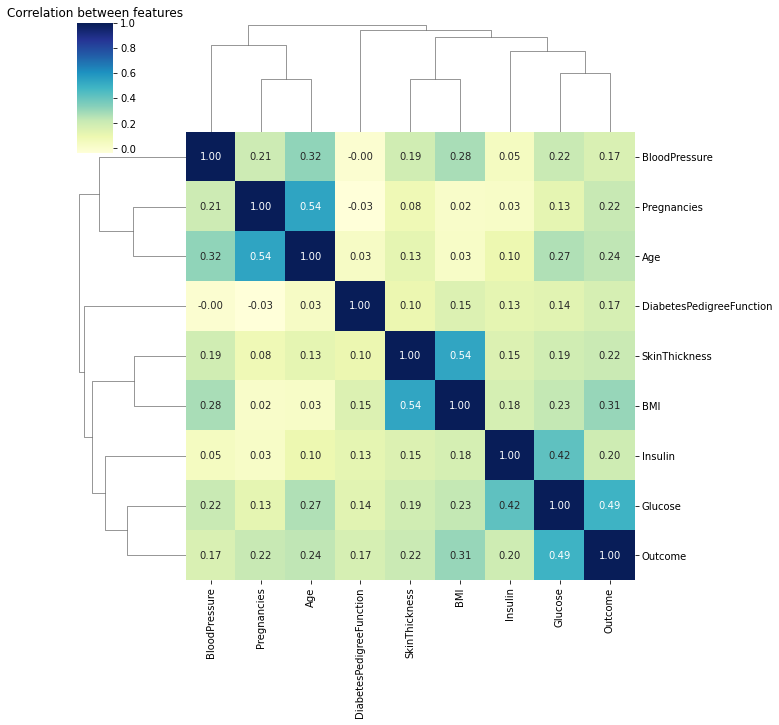

In [23]:
corr_data = data.corr()
sns.clustermap(corr_data,annot = True, cmap = "YlGnBu", fmt = '.2f')
plt.title('Correlation between features')
plt.show()

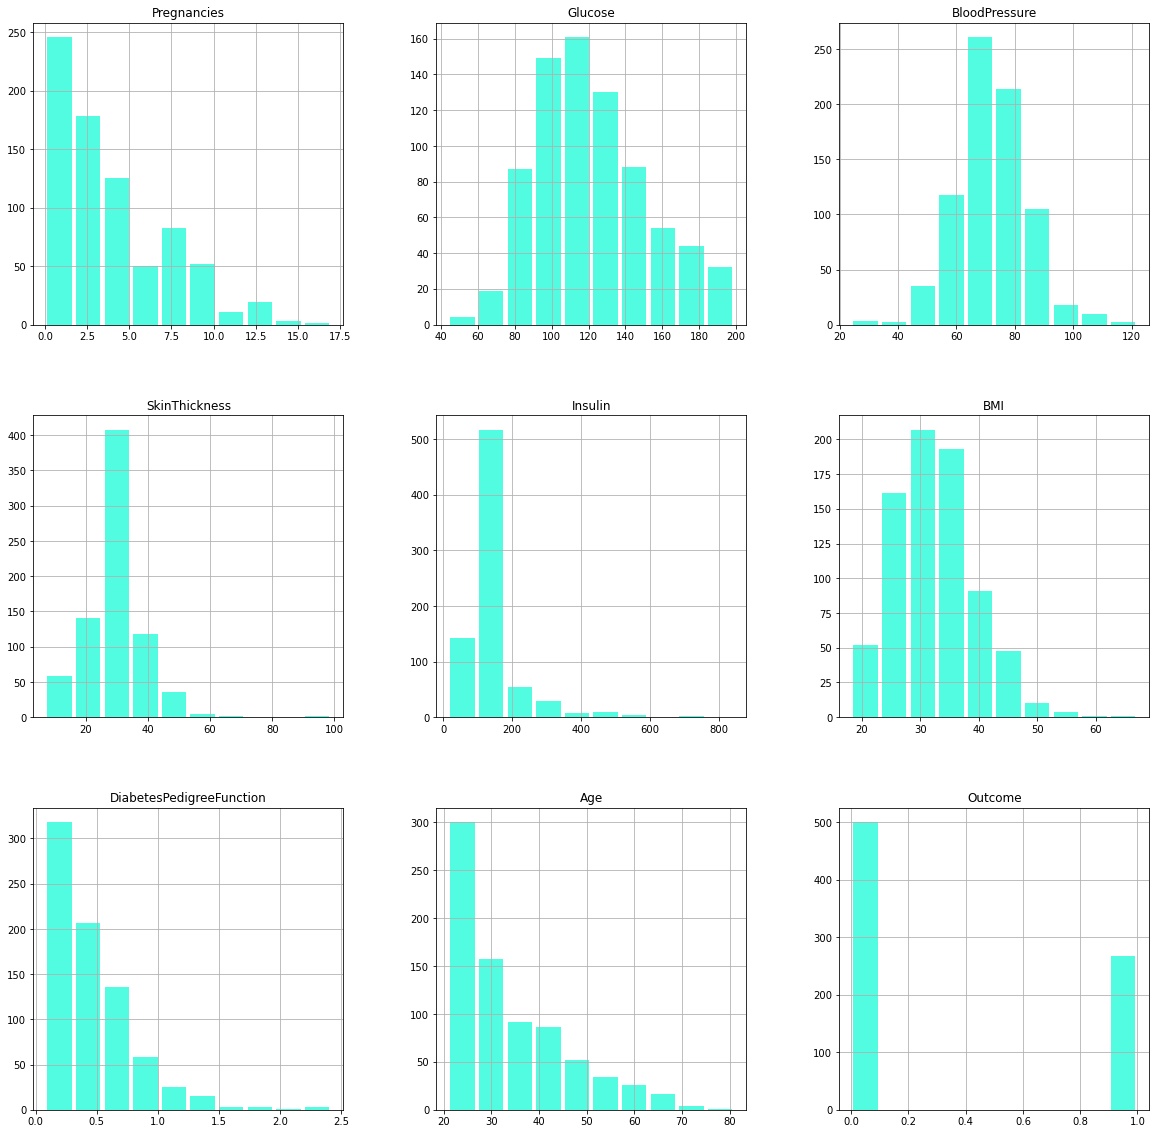

In [24]:
fig = data.hist(figsize=(20,20), color='#09FBD3', alpha = 0.7, rwidth=0.85 )

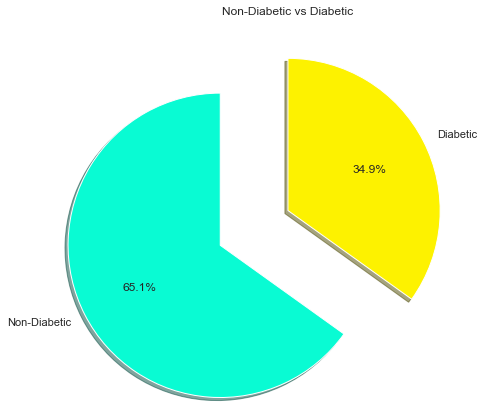

In [25]:
sns.set(style="whitegrid")
labels = ['Non-Diabetic','Diabetic']
size = data['Outcome'].value_counts(sort=True)

colors = ['#09FBD3','#FDF200']
explode = (0.5,0)

plt.figure(figsize=(7,7))
plt.pie(size, explode = explode, labels = labels, colors= colors, autopct = '%1.1f%%', shadow = True, startangle = 90,)

plt.title('Non-Diabetic vs Diabetic')
plt.show()

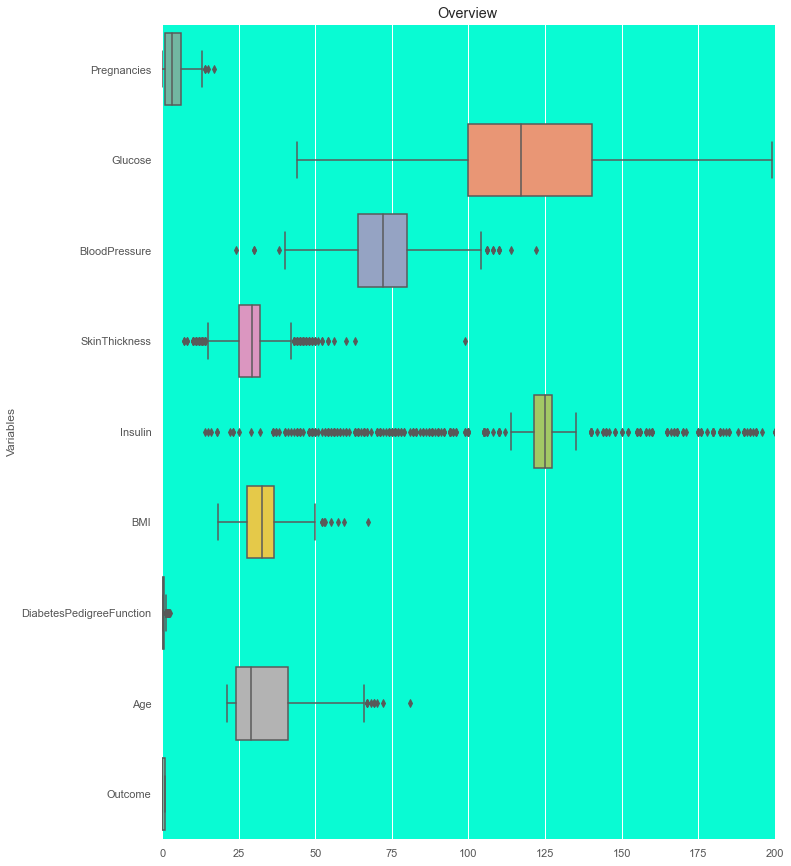

In [29]:
plt.style.use('ggplot')

f, ax = plt.subplots(figsize=(11,15))

ax.set_facecolor('#09FBD3')
ax.set(xlim=(-0.5,200))
plt.ylabel('Variables')
plt.title('Overview')
ax = sns.boxplot(data = data, orient= 'h', palette = 'Set2',)

In [30]:
def displot(col_name):
    plt.figure()
    sns.set(style='whitegrid')
    ax = sns.distplot(data[col_name][data.Outcome==1], color = "gold", rug = True)
    sns.distplot(data[col_name][data.Outcome==0], color ="#09FBD3",rug = True)
    plt.legend(['Diabetic', 'Healthy'])

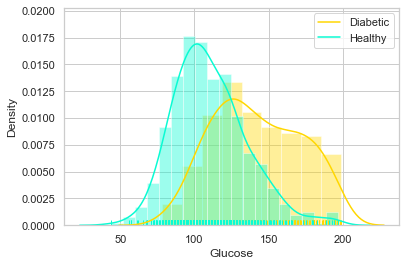

In [31]:
displot('Glucose')

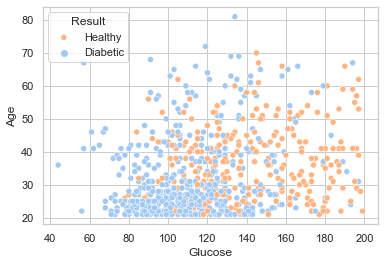

In [32]:
sns.set(style='whitegrid')
g = sns.scatterplot(x='Glucose',y='Age',data=data, hue='Outcome',palette='pastel',legend = True)
plt.legend(title='Result', loc = 'upper left', labels = ['Healthy', 'Diabetic'])
plt.show(g)

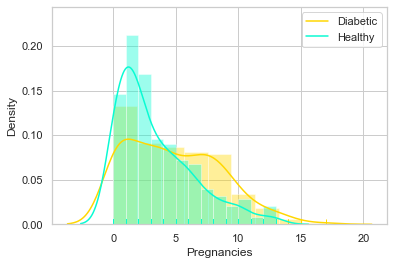

In [34]:
displot('Pregnancies')

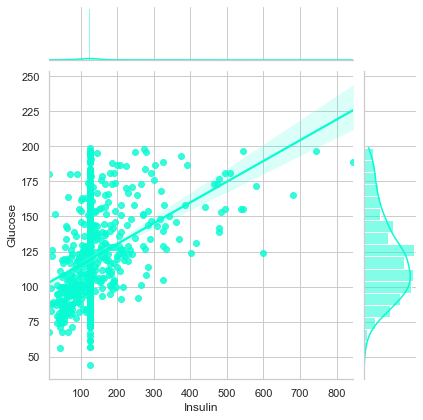

In [35]:
sns.jointplot(x='Insulin', y = 'Glucose', data = data , kind = 'reg', color ='#09FBD3')
plt.show()

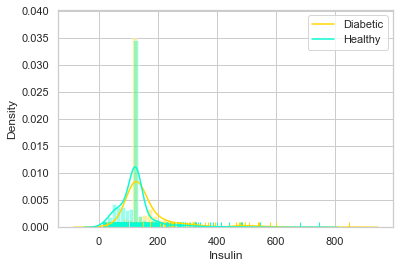

In [37]:
displot('Insulin')

## Modelling

In [38]:
df = data
zero = df[df['Outcome']==0]
one = df[df['Outcome']==1]

#creamos nuevos datos para poder tener equilibradas las clases de salida diabetes y no diabetes
from sklearn.utils import resample

df_minority_upsampled = resample(one,replace = True, n_samples = 500)

#concatenate
df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle

df = shuffle(df)

In [39]:
df.shape

(1000, 9)

# Dividir los datos en entrenamiento y testeo

In [55]:
from sklearn.model_selection import train_test_split

X= df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.15, random_state = 42, stratify = y)

In [45]:
!pip install xgboost

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pickle

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns

In [47]:
classifiers = {
    "Naive Bayes" : GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "XG Boost": XGBClassifier(),
    "Support Vector Classifier": SVC(),
    "DesicionTreeClassifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    
}

In [49]:
X_train.shape

(850, 8)

In [53]:
y_train.shape

(850,)

[21:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


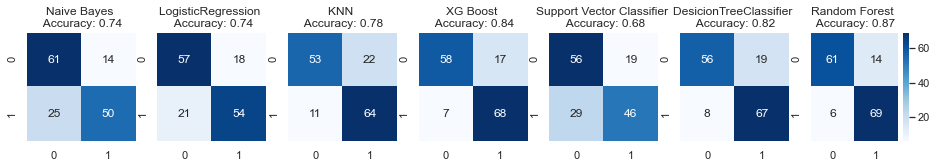

In [56]:
accuracy = []
cf_matrix =dict.fromkeys(classifiers.keys())

for key, classifier in classifiers.items():
    model = classifier.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    
    cf_matrix[key] = confusion_matrix(y_test, y_pred)
    accuracy.append("{:.2f}".format(accuracy_score(y_test, y_pred)))
    
    
    filename = key +".sav"
    pickle.dump(classifier, open(filename, "wb"))
    

fig, axn = plt.subplots(1,7, sharex = True, figsize=(16,2))


for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax, cbar=i==6, annot = True, cmap='Blues')
    ax.set_title('{:s} \n Accuracy: {:s}'.format(k, accuracy[i]),fontsize=12)
    

# Test model

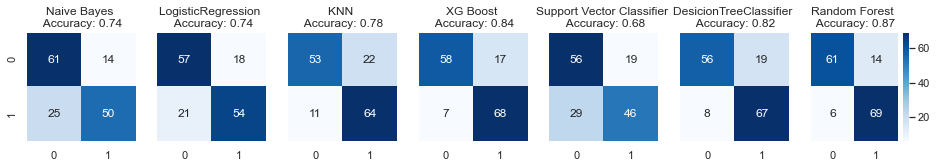

In [59]:
for key, _ in classifiers.items():
    filename = key+".sav"
    
    loaded_model = pickle.load(open(filename,'rb'))
    y_pred = loaded_model.predict(X_test)
    
    cf_matrix[key]=confusion_matrix(y_test, y_pred)
    accuracy.append("{:.2f}".format(accuracy_score(y_test, y_pred)))
    

fig, axn = plt.subplots(1,7, sharex=True, sharey=True,figsize=(16,2))


for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k], ax=ax, cbar=i==6, annot=True, cmap="Blues")
    ax.set_title("{:s} \n Accuracy: {:s}".format(k,accuracy[i]),fontsize=12)